# Lego inventory cleaning

## Libraries Loading

In [1]:
# !pip install openpyxl  # installation only once and if missing
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')

## Data Loading

In [2]:
# by STEFAN SMID
# read file from Github

username = "StefanFSmid"
repository = "ASDA_2025_Group_3_Porfolio"
directory = "additional_material/LegoDatabase.xlsx"
file_path = f"https://raw.githubusercontent.com/{username}/{repository}/main/{directory}"

In [3]:
# combine all sheets from an Excel file into a single DataFrame and save to a new Excel file

# Step 1: Load the Excel file
#file_path = r"C:\Users\sassa\MDS2025\ASDA_2025_Group_3_Porfolio\datasets\LegoDatabase.xlsx"

# Read all sheets into DataFrames
all_sheets = pd.read_excel(file_path, sheet_name=None)  

# Step 2: Concatenate all sheets into one DataFrame
combinedLego_df = pd.concat(all_sheets.values(), ignore_index=True)

In [4]:
# Step 3: Save the merged DataFrame to a new Excel file
# Comment by STEFAN: only done once by one group member

## combinedLego_df.to_excel(r"C:\Users\sassa\MDS2025\ASDA_2025_Group_3_Porfolio\datasets\combined_LegoDataset.xlsx", index=False)

# otherwise to be read directly from Github as well:
## username = "StefanFSmid"
## repository = "ASDA_2025_Group_3_Porfolio"
## directory = "/tree/main/additional_material/combined_LegoDataset.xlsx"
## file_path = f"https://raw.githubusercontent.com/{username}/{repository}/main/{directory}"

## Data Initial Inspection

In [5]:
combinedLego_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               0 non-null      object 
 1   color            204 non-null    object 
 2   is duplo?        204 non-null    object 
 3   size type        204 non-null    object 
 4   base shape       204 non-null    object 
 5   base dimensions  204 non-null    object 
 6   number of studs  204 non-null    float64
 7   has slope?       204 non-null    object 
 8   slope degree     168 non-null    float64
 9   in stock         204 non-null    object 
 10  transparent      40 non-null     float64
dtypes: float64(3), object(8)
memory usage: 17.7+ KB


In [6]:
combinedLego_df.describe()


,number of studs,slope degree,transparent
count,204.000000,168.000000,40.000000
mean,4.906863,6.160714,0.100000
std,4.996171,15.340186,0.303822
min,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000
50%,4.000000,0.000000,0.000000
75%,6.000000,0.000000,0.000000
max,24.000000,45.000000,1.000000


In [7]:
combinedLego_df.select_dtypes(include=object)


,id,color,is duplo?,size type,base shape,base dimensions,has slope?,in stock
0,NaN,Dark Blue,True,Brick,Rectangle,2 x 4,False,1
1,NaN,Green,True,Brick,Rectangle,2 x 4,False,1
2,NaN,Coral,True,Brick,Square,2 x 2,False,1
3,NaN,Red,True,Brick,Square,2 x 2,False,1
4,NaN,White,True,Brick,Square,2 x 2,False,1
...,...,...,...,...,...,...,...,...
199,NaN,Transparent orange,False,Plate,Square,1*1,False,1
200,NaN,Blck,False,Plate,Trapezium,2*2,False,1
201,NaN,Yellow,False,Plate,Rectangle,1*2,False,1
202,NaN,Transparent sky blue,False,Plate,Round,1*1,False,1


## Data Cleaning

In [8]:
# deletion of id column
combinedLego_df.drop(columns=['id'],inplace=True)

In [9]:
# Find the unique values in 'color' column
print(combinedLego_df['color'].unique())

['Dark Blue' 'Green' 'Coral' 'Red' 'White' 'Light Green' 'Orange' 'Yellow'
 'Brown' 'Purple' 'Lilac' 'Orchid' 'Dark Grey' 'Light Grey' 'Pink'
 'Dark Green' 'Cream' 'Black' 'Red Brown' 'Neon Yellow' 'Cyan'
 'Denim Blue' 'Ice Blue' 'Capri' 'Shiny Green' 'Olive Green' 'Beige'
 'Bright Pink' 'Transparent' 'lightgreen' 'lightbrown' 'lightpink' 'red'
 'yellow' 'darkblue' 'darkgreen' 'darkpink' 'orange' 'darkpurple'
 'lightpurple' 'white' 'grey' 'mudbrown' 'black' 'turquoise' 'lightblue'
 'neon orange' 'neon dark yellow' 'neon light yellow' 'darkbrown'
 'bright green' 'pink' 'peach' 'blue' 'pear' 'dark green ' 'dark green'
 'sky blue' 'bright yellow' 'navy blue' 'purple' 'maroon' 'cream' 'khaki'
 'neon green' 'neon yellow' 'neon blue' 'coral' 'lime green' 'green'
 'brick red' 'cyan' 'baby blue' 'cafe' 'hot magent' 'Green ' 'Blue' 'Grey'
 'Sky Blue' 'Deep Blue' 'Sky blue' 'Transparent yellow'
 'Transparent orange' 'Blck' 'Transparent sky blue']


In [10]:
combinedLego_df['color'].value_counts(ascending=True)

color
mudbrown       1
darkpurple     1
lightpurple    1
Blck           1
lightblue      1
              ..
black          8
red            8
grey           9
white          9
yellow         9
Name: count, Length: 85, dtype: int64

In [11]:
print(combinedLego_df['color'].nunique())

85


In [12]:
# Step 1: Lowercase everything
combinedLego_df['color'] = combinedLego_df['color'].astype(str).str.lower()
# Find the unique values in 'color' column
print(sorted(combinedLego_df['color'].unique()))
print("Number of unique colors:", len(combinedLego_df['color'].unique()))



['baby blue', 'beige', 'black', 'blck', 'blue', 'brick red', 'bright green', 'bright pink', 'bright yellow', 'brown', 'cafe', 'capri', 'coral', 'cream', 'cyan', 'dark blue', 'dark green', 'dark green ', 'dark grey', 'darkblue', 'darkbrown', 'darkgreen', 'darkpink', 'darkpurple', 'deep blue', 'denim blue', 'green', 'green ', 'grey', 'hot magent', 'ice blue', 'khaki', 'light green', 'light grey', 'lightblue', 'lightbrown', 'lightgreen', 'lightpink', 'lightpurple', 'lilac', 'lime green', 'maroon', 'mudbrown', 'navy blue', 'neon blue', 'neon dark yellow', 'neon green', 'neon light yellow', 'neon orange', 'neon yellow', 'olive green', 'orange', 'orchid', 'peach', 'pear', 'pink', 'purple', 'red', 'red brown', 'shiny green', 'sky blue', 'transparent', 'transparent orange', 'transparent sky blue', 'transparent yellow', 'turquoise', 'white', 'yellow']
Number of unique colors: 68


In [13]:
# Remove all spaces in the 'color' column
combinedLego_df['color'] = combinedLego_df['color'].str.replace(' ', '', regex=False)

# Fix specific misspellings
combinedLego_df['color'] = combinedLego_df['color'].replace({
    'blck': 'black',
    'hotmagent': 'hotmagenta',
})

# Check sorted unique values
print(sorted(combinedLego_df['color'].unique()))
print("Number of unique colors:", len(combinedLego_df['color'].unique()))



['babyblue', 'beige', 'black', 'blue', 'brickred', 'brightgreen', 'brightpink', 'brightyellow', 'brown', 'cafe', 'capri', 'coral', 'cream', 'cyan', 'darkblue', 'darkbrown', 'darkgreen', 'darkgrey', 'darkpink', 'darkpurple', 'deepblue', 'denimblue', 'green', 'grey', 'hotmagenta', 'iceblue', 'khaki', 'lightblue', 'lightbrown', 'lightgreen', 'lightgrey', 'lightpink', 'lightpurple', 'lilac', 'limegreen', 'maroon', 'mudbrown', 'navyblue', 'neonblue', 'neondarkyellow', 'neongreen', 'neonlightyellow', 'neonorange', 'neonyellow', 'olivegreen', 'orange', 'orchid', 'peach', 'pear', 'pink', 'purple', 'red', 'redbrown', 'shinygreen', 'skyblue', 'transparent', 'transparentorange', 'transparentskyblue', 'transparentyellow', 'turquoise', 'white', 'yellow']
Number of unique colors: 62


In [14]:
# Find the unique values in 'is duplo?' column
print(combinedLego_df['is duplo?'].unique())

[True False 'yes' 'no']


In [15]:
print(combinedLego_df['is duplo?'].nunique())

4


In [16]:
combinedLego_df['is duplo?'].value_counts()

is duplo?
False    103
no        68
True      19
yes       14
Name: count, dtype: int64

In [17]:
# Standardize 'is duplo?' column values
combinedLego_df['is duplo?'] = combinedLego_df['is duplo?'].map({
    1: 'Yes',
    0: 'No',
    True: 'Yes',
    False: 'No',
    'yes': 'Yes',
    'no': 'No'
})

# Print updated unique values
print(combinedLego_df['is duplo?'].unique())

['Yes' 'No']


In [18]:
# Find the unique values in 'size type' column
print(combinedLego_df['size type'].unique())

['Brick' 'Plate' 'plate' 'brick' 'tile']


In [19]:
print(combinedLego_df['size type'].nunique())

5


In [20]:
combinedLego_df['size type'].value_counts()

size type
plate    60
brick    58
Plate    44
Brick    38
tile      4
Name: count, dtype: int64

In [21]:
# Standardize 'size type' column values
combinedLego_df['size type'] = combinedLego_df['size type'].replace({
    'brick': 'Brick',
    'plate': 'Plate',
    'tile': 'Plate'
})

# Print updated unique values
print(combinedLego_df['size type'].unique())

['Brick' 'Plate']


In [22]:
# Find the unique values in 'base shape' column
print(combinedLego_df['base shape'].unique())

['Rectangle' 'Square' 'Circle' 'Trapezium' 'rectangle' 'square' 'triangle'
 'trapezium' 'circle' 'trapezoid' 'Round' 'Wadge']


In [23]:
print(combinedLego_df['base shape'].nunique())

12


In [24]:
combinedLego_df['base shape'].value_counts()

base shape
rectangle    65
Rectangle    44
square       35
Square       24
circle       15
Circle        5
Round         5
trapezoid     4
Trapezium     3
triangle      2
trapezium     1
Wadge         1
Name: count, dtype: int64

In [25]:
# Standardize 'base shape' column values
combinedLego_df['base shape'] = combinedLego_df['base shape'].replace({
    'rectangle': 'Rectangle',
    'square': 'Square',
    'triangle': 'Triangle',
    'circle': 'Circle',
    'Round': 'Circle',
    'trapezium': 'Trapezium',
    'trapezoid': 'Trapezium',
    'Wadge': 'Trapezium'

})

# Print updated unique values
print(combinedLego_df['base shape'].unique())

['Rectangle' 'Square' 'Circle' 'Trapezium' 'Triangle']


In [26]:
# Find the unique values in 'base dimensions' column
print(combinedLego_df['base dimensions'].unique())

['2 x 4' '2 x 2' '2 x 8' '1 x 4' '1 x 3' '2 x 6' '1 x 2' '4 x 6' '1 x 1'
 '2 x 3' '0 x 0 ' '0 x 0' '2 x 4 + 2 x 2' '2*4' '2*8' '2*2' '2*6' '2*3'
 '1*3' '1*4' '1*2' '1*1' '4*6' '4 X 2' '2 X 2' '8 X 2' '6 X 2' '4 X 1'
 '2 X 1' '3 X 2' '6 X 4' '1 X 1' '4 X 4' '3 X 1' '2x4' '2x8' '2x2' '2x6'
 '2x3' '1x2' '1x4' '1x3' '1x1' '4x4' '4x6' '4*4']


In [27]:
print(combinedLego_df['base dimensions'].nunique())

46


In [28]:
combinedLego_df['base dimensions'].value_counts()

base dimensions
2*2              17
1*1              17
1*2              15
2x2              11
2*4              11
2 X 2            10
2 x 2             9
4 X 2             7
1x2               7
1 x 2             7
2 X 1             7
1x1               6
1 X 1             6
1*4               6
2x4               5
2 x 4             5
1 x 1             4
2*8               4
2*6               3
1*3               3
1 x 4             3
1x4               3
0 x 0             3
2*3               3
4 X 1             3
2x8               2
2 x 8             2
3 X 2             2
2x3               2
8 X 2             2
2 x 3             2
4*6               2
0 x 0             2
2x6               1
1x3               1
4x6               1
4x4               1
4 x 6             1
1 x 3             1
2 x 6             1
3 X 1             1
4 X 4             1
6 X 4             1
6 X 2             1
2 x 4 + 2 x 2     1
4*4               1
Name: count, dtype: int64

In [29]:
# Standardize base dimensions
combinedLego_df['base dimensions'] = (
    combinedLego_df['base dimensions']
    .astype(str)                       
    .str.strip()                       
    .str.lower()                       
    .str.replace(r'\s*x\s*', 'x', regex=True)  
    .str.replace(r'\*', 'x', regex=True)       
    .str.split('+').str[0]             
    .str.strip()                        
)
# Print updated unique values
print(combinedLego_df['base dimensions'].unique())

['2x4' '2x2' '2x8' '1x4' '1x3' '2x6' '1x2' '4x6' '1x1' '2x3' '0x0' '4x2'
 '8x2' '6x2' '4x1' '2x1' '3x2' '6x4' '4x4' '3x1']


In [30]:
# Further standardize common patterns in 'base dimensions'
combinedLego_df['base dimensions'] = (
    combinedLego_df['base dimensions']
    .str.replace('4x2', '2x4')
    .str.replace('8x2', '2x8')
    .str.replace('6x2', '2x6')
    .str.replace('4x1', '1x4')
    .str.replace('3x1', '1x3')
    .str.replace('6x4', '4x6')
    .str.replace('3x2', '2x3')
    .str.replace('2x1', '1x2')
)
# Print updated unique values
print(combinedLego_df['base dimensions'].unique())

['2x4' '2x2' '2x8' '1x4' '1x3' '2x6' '1x2' '4x6' '1x1' '2x3' '0x0' '4x4']


In [31]:
# Find the unique values in 'has slope?' column
print(combinedLego_df['has slope?'].unique())

[False True 'no' 'yes']


In [32]:
print(combinedLego_df['has slope?'].nunique())

4


In [33]:
# Standardize 'has slope?' column values
combinedLego_df['has slope?'] = combinedLego_df['has slope?'].map({
    1: 'Yes',
    0: 'No',
    True: 'Yes',
    False: 'No',
    'yes': 'Yes',
    'no': 'No'
})

# Print updated unique values
print(combinedLego_df['has slope?'].unique())

['No' 'Yes']


In [34]:
# Find the unique values in 'slope degree' column
print(combinedLego_df['slope degree'].unique())

[nan 45.  0. 15. 30.]


In [35]:
# Convert blanks to 0
combinedLego_df['slope degree'] = combinedLego_df['slope degree'].fillna(0)

# Print updated unique values
print(combinedLego_df['slope degree'].unique())


[ 0. 45. 15. 30.]


In [36]:
# Find the unique values in 'in stock' column
print(combinedLego_df['in stock'].unique())

[1 'yes']


In [37]:
# Set all values to 1 since yes are 1s
combinedLego_df['in stock'] = 1

# Print updated unique values
print(combinedLego_df['in stock'].unique())

[1]


In [38]:
# Drop the 'transparent' column
combinedLego_df = combinedLego_df.drop(columns=['transparent'])

# Verify all column lists in dataframe
print(combinedLego_df.columns)


Index(['color', 'is duplo?', 'size type', 'base shape', 'base dimensions',
       'number of studs', 'has slope?', 'slope degree', 'in stock'],
      dtype='object')


In [39]:
combinedLego_df['has slope?'].value_counts()

has slope?
No     180
Yes     24
Name: count, dtype: int64

In [40]:
num_duplicates = combinedLego_df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")
print("Old dataset shape:", combinedLego_df.shape)

Number of duplicate rows: 19
Old dataset shape: (204, 9)


In [41]:
print("\nDuplicate rows (example):")
print(combinedLego_df[combinedLego_df.duplicated(keep=False)])


Duplicate rows (example):
        color is duplo? size type base shape base dimensions  number of studs  \
0    darkblue       Yes     Brick  Rectangle             2x4              8.0   
1       green       Yes     Brick  Rectangle             2x4              8.0   
3         red       Yes     Brick     Square             2x2              4.0   
9      yellow        No     Brick  Rectangle             2x4              8.0   
11   darkblue        No     Brick  Rectangle             2x6             12.0   
22        red        No     Brick     Circle             2x2              4.0   
24      black        No     Plate     Square             1x2              2.0   
45        red       Yes     Brick  Rectangle             2x4              8.0   
46     yellow       Yes     Brick     Square             2x2              4.0   
47   darkblue       Yes     Brick  Rectangle             2x4              8.0   
48   darkblue        No     Brick  Rectangle             2x6             12.0   
5

In [42]:
#Group all columns except 'in stock' and sum suplicates in 'in stock'
combinedLego_df = combinedLego_df.groupby(
    combinedLego_df.columns.difference(['in stock']).tolist(),
    as_index=False
).agg({'in stock': 'sum'})

# Step 2: Confirm duplicates are merged
print("Duplicates merged successfully.")
print("New dataset shape:", combinedLego_df.shape)

# Optional: check if any duplicates remain
print("Remaining duplicates:", combinedLego_df.duplicated(subset=combinedLego_df.columns.difference(['in stock'])).sum())

# Step 3: Print the cleaned DataFrame
print("\nCleaned DataFrame (first 10 rows):")
print(combinedLego_df.sample(10))

Duplicates merged successfully.
New dataset shape: (185, 9)
Remaining duplicates: 0

Cleaned DataFrame (first 10 rows):
    base dimensions base shape       color has slope? is duplo?  \
94              2x2     Circle       black         No        No   
77              1x3  Rectangle      yellow         No        No   
142             2x4     Circle       beige         No        No   
111             2x2     Square  lightgreen         No       Yes   
19              1x1     Square       beige         No        No   
153             2x4  Rectangle        grey         No        No   
48              1x2  Rectangle       green         No        No   
57              1x2  Rectangle        pink        Yes        No   
36              1x1     Square      yellow         No        No   
143             2x4  Rectangle       beige         No        No   

     number of studs size type  slope degree  in stock  
94               4.0     Plate           0.0         1  
77               3.0     Bri

## Data Final Inspection

In [43]:
combinedLego_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   base dimensions  185 non-null    object 
 1   base shape       185 non-null    object 
 2   color            185 non-null    object 
 3   has slope?       185 non-null    object 
 4   is duplo?        185 non-null    object 
 5   number of studs  185 non-null    float64
 6   size type        185 non-null    object 
 7   slope degree     185 non-null    float64
 8   in stock         185 non-null    int64  
dtypes: float64(2), int64(1), object(6)
memory usage: 13.1+ KB


## (Optional) Basic exploration plots

<Axes: xlabel='base shape', ylabel='count'>

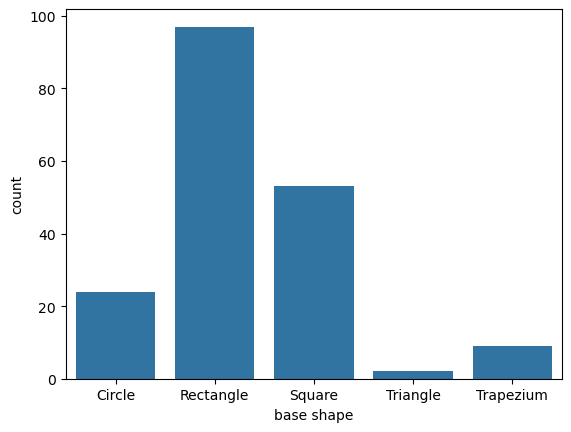

In [44]:
# by Stefan Smid

sns.countplot(combinedLego_df, x="base shape")

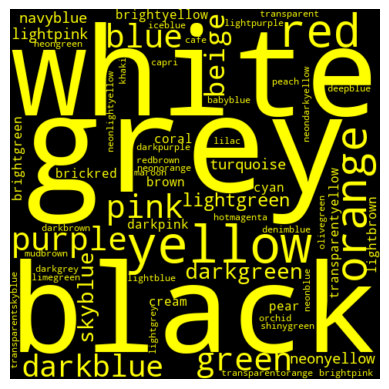

In [45]:
# by Stefan Smid
# OPTIONAL OPTIONAL not really basic but fun; reference: https://python-graph-gallery.com/wordcloud/
# License: https://github.com/holtzy/The-Python-Graph-Gallery/blob/master/LICENSE

# Libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a list of word
#text=("Python Python Python Matplotlib")
text = combinedLego_df['color'].to_string()

# Create the wordcloud object
wordcloud = WordCloud(width=480, height=480, margin=0, color_func=lambda *args, **kwargs: (255, 255, 0)).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()